# Importing necessary libraries

In [39]:
# Importing the NumPy library and aliasing it as np
import numpy as np

# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Importing Datasets

In [40]:
# Reading the training data from a CSV file and storing it in the 'train_data' DataFrame
train_data = pd.read_csv('/content/drive/MyDrive/ML_TEXT/train.csv')

# Reading the training labels from a CSV file and storing it in the 'train_labels' DataFrame
train_labels = pd.read_csv('/content/drive/MyDrive/ML_TEXT/trainLabels.csv')

Explanation:
- This line reads the training data from a CSV file located at '/content/drive/MyDrive/ML_TEXT/train.csv'.
- The data is loaded into a DataFrame named 'train_data' using the `pd.read_csv()` function from the pandas library.
- This line reads the training labels from a CSV file located at '/content/drive/MyDrive/ML_TEXT/trainLabels.csv'.
- The labels are loaded into a DataFrame named 'train_labels' using the `pd.read_csv()` function from the pandas library.


# Merging DataFrames

In [41]:
# Merging the 'train_data' and 'train_labels' DataFrames based on the 'id' column
# The result is stored in a new DataFrame named 'df'
df = pd.merge(train_data, train_labels, left_on='id', right_on='id')

Explanation:
- This code merges the 'train_data' and 'train_labels' DataFrames based on the 'id' column.
- The result of the merge operation is stored in a new DataFrame named 'df'.
- It uses the `pd.merge()` function from the pandas library, specifying the left and right DataFrames (`train_data` and `train_labels`), and the column to merge on (`id`).


In [42]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0,0,0,0,0,0,0,0,0,1
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0,0,0,0,0,0,0,0,0,0
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0,0,0,0,0,0,0,0,0,1
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0,0,0,0,0,0,0,0,0,1


# Data Imputation Using SimpleImputer




In [43]:
from sklearn.impute import SimpleImputer

# Display the count of missing values before handling
print("Count of Missing Values Before Handling:")
print(df.isnull().sum())

# Extract numerical columns excluding 'id'
numerical_columns = df.select_dtypes(include=['number']).columns.difference(['id'])

# Create an instance of SimpleImputer for numerical columns (e.g., mean strategy)
numerical_imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it for numerical columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Extract categorical columns excluding 'id'
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['id'])

# Create an instance of SimpleImputer for categorical columns (e.g., most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it for categorical columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Display the count of missing values after handling
print("\nCount of Missing Values After Handling:")
print(df.isnull().sum())

Count of Missing Values Before Handling:
id        0
x1     1426
x2     1426
x3     1426
x4     1426
       ... 
y29       0
y30       0
y31       0
y32       0
y33       0
Length: 179, dtype: int64

Count of Missing Values After Handling:
id     0
x1     0
x2     0
x3     0
x4     0
      ..
y29    0
y30    0
y31    0
y32    0
y33    0
Length: 179, dtype: int64


### Handling Missing Values with SimpleImputer

This markdown explanation illustrates the process of handling missing values in a DataFrame `df` using `SimpleImputer` from scikit-learn. It includes the following steps:

1. **Counting Missing Values Before Handling:**
   - Displaying the count of missing values in the DataFrame `df` before handling.
   
2. **Extracting Numerical Columns:**
   - Identifying numerical columns in the DataFrame excluding the 'id' column.

3. **Imputing Missing Values for Numerical Columns:**
   - Creating an instance of `SimpleImputer` with the strategy set to 'mean'.
   - Fitting the imputer on the numerical columns and transforming them to replace missing values with the mean.

4. **Extracting Categorical Columns:**
   - Identifying categorical columns in the DataFrame excluding the 'id' column.

5. **Imputing Missing Values for Categorical Columns:**
   - Creating another instance of `SimpleImputer` with the strategy set to 'most_frequent'.
   - Fitting the imputer on the categorical columns and transforming them to replace missing values with the most frequent value.

6. **Counting Missing Values After Handling:**
   - Displaying the count of missing values in the DataFrame `df` after handling.


In [44]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns to standardize, excluding 'id'
numerical_columns = df.select_dtypes(include=['number']).columns.difference(['id'])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the DataFrame after standard scaling
print("\nDataFrame after Standard Scaling:")
print(df.head())



DataFrame after Standard Scaling:
   id   x1  x2                                            x3  \
0   1   NO  NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1   2   NO  NO  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   
2   3   NO  NO  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3   4  YES  NO  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4   5   NO  NO  RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=   

                                             x4        x5        x6        x7  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk= -0.740232  0.151886 -0.878525   
1  hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g= -1.839152 -0.417309 -2.241569   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  0.718311 -0.017129  0.407455   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig= -0.592802 -0.094570  0.422221   
4  3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=  0.859576 -0.417309  0.589880   

         x8        x9  ...       y24       y25      y26       y27       y28  \
0 -0.173273  0

### Explanation

- The `StandardScaler` class from the `sklearn.preprocessing` module is imported to standardize numerical data.
- We identify the numerical columns in the DataFrame `df` using the `select_dtypes` method with the parameter `include=['number']`, excluding the column 'id' using the `difference` method.
- An instance of `StandardScaler` is created and stored in the variable `scaler`.
- The `fit_transform` method of `scaler` is applied to standardize the numerical columns in `df`.
- The standardized numerical columns are assigned back to the DataFrame `df`.
- The DataFrame `df` after standard scaling is printed using the `head` method to display the first few rows.


# Feature Hashing for Dimensionality Reduction

In [46]:
from sklearn.feature_extraction import FeatureHasher

# Specify the number of features (dimensions) after hashing
n_features = 10

# Convert the specified columns to a list of lists
hash_columns = df[['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']].astype(str).values.tolist()

# Initialize the FeatureHasher
hasher = FeatureHasher(n_features=n_features, input_type='string')

# Apply feature hashing to the list of lists
hashed_features = hasher.transform(hash_columns)

# Convert the hashed features to a dense NumPy array
hashed_features_array = hashed_features.toarray()


### Explanation

- The `FeatureHasher` class from the `sklearn.feature_extraction` module is imported for feature hashing.
- The number of features (dimensions) after hashing is specified and stored in the variable `n_features`.
- The specified columns `'x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'` from the DataFrame `df` are converted to a list of lists, where each sublist contains the string representations of values in the respective column.
- An instance of `FeatureHasher` is initialized with the specified number of features (`n_features`) and input type (`'string'`).
- Feature hashing is applied to the list of lists (`hash_columns`) using the `transform` method of `hasher`.
- The hashed features are converted to a dense NumPy array and stored in the variable `hashed_features_array`.


# Integrating Hashed Features into DataFrame

In [47]:
# Drop the original hash columns from the DataFrame
df = df.drop(['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'], axis=1)

# Create a DataFrame using the hashed features array with appropriate column names
hashed_features_df = pd.DataFrame(hashed_features_array, columns=[f'hashed_feature_{i}' for i in range(n_features)])

# Concatenate the original DataFrame (excluding the original hash columns) with the new hashed features DataFrame
df = pd.concat([df, hashed_features_df], axis=1)

### Explanation

- The original hash columns `'x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'` are dropped from the DataFrame `df` using the `drop` method with `axis=1`.
- A new DataFrame `hashed_features_df` is created using the `hashed_features_array`, where the columns are named with the convention `'hashed_feature_i'` for `i` ranging from 0 to `n_features - 1`.
- The original DataFrame `df` (excluding the original hash columns) is concatenated with the new hashed features DataFrame `hashed_features_df` along `axis=1` using the `concat` function from pandas.


In [48]:
df.head()

,id,x1,x2,x5,x6,x7,x8,x9,x10,x11,...,hashed_feature_0,hashed_feature_1,hashed_feature_2,hashed_feature_3,hashed_feature_4,hashed_feature_5,hashed_feature_6,hashed_feature_7,hashed_feature_8,hashed_feature_9
0,1,NO,NO,-0.740232,0.151886,-0.878525,-0.173273,0.081133,YES,NO,...,-1.0,0.0,0.0,1.0,0.0,1.0,-1.0,2.0,0.0,0.0
1,2,NO,NO,-1.839152,-0.417309,-2.241569,-0.524932,-1.490985,NO,NO,...,-1.0,2.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,1.0,0.0
2,3,NO,NO,0.718311,-0.017129,0.407455,-0.398976,0.178413,NO,NO,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2.0,-1.0
3,4,YES,NO,-0.592802,-0.094570,0.422221,-0.248793,0.360934,YES,NO,...,0.0,1.0,2.0,0.0,0.0,4.0,-2.0,0.0,1.0,0.0
4,5,NO,NO,0.859576,-0.417309,0.589880,-0.524932,-0.242217,NO,NO,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Encoding Categorical Columns with LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['x1', 'x2', 'x10', 'x11', 'x12', 'x13', 'x14', 'x24', 'x25', 'x26', 'x30', 'x31', 'x32', 'x33', 'x41', 'x42', 'x43', 'x44', 'x45', 'x55', 'x56', 'x57', 'x62', 'x63', 'x71', 'x72', 'x73', 'x74', 'x75', 'x85', 'x86', 'x87', 'x92', 'x93', 'x101', 'x102', 'x103','x104','x105', 'x115', 'x116', 'x117', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140', 'x141', 'x142']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


### Explanation

- The `LabelEncoder` class from the `sklearn.preprocessing` module is imported for label encoding categorical data.
- An instance of `LabelEncoder` is created and stored in the variable `label_encoder`.
- A list named `categorical_columns` is initialized to contain the names of categorical columns in the DataFrame `df`.
- Label encoding is applied to each categorical column in the DataFrame `df`:
  - For each column in `categorical_columns`, label encoding is performed using the `fit_transform` method of `label_encoder`.
  - The original categorical values in the column are replaced with their corresponding encoded labels.


In [50]:
df.head()

,id,x1,x2,x5,x6,x7,x8,x9,x10,x11,...,hashed_feature_0,hashed_feature_1,hashed_feature_2,hashed_feature_3,hashed_feature_4,hashed_feature_5,hashed_feature_6,hashed_feature_7,hashed_feature_8,hashed_feature_9
0,1,0,0,-0.740232,0.151886,-0.878525,-0.173273,0.081133,1,0,...,-1.0,0.0,0.0,1.0,0.0,1.0,-1.0,2.0,0.0,0.0
1,2,0,0,-1.839152,-0.417309,-2.241569,-0.524932,-1.490985,0,0,...,-1.0,2.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,1.0,0.0
2,3,0,0,0.718311,-0.017129,0.407455,-0.398976,0.178413,0,0,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2.0,-1.0
3,4,1,0,-0.592802,-0.094570,0.422221,-0.248793,0.360934,1,0,...,0.0,1.0,2.0,0.0,0.0,4.0,-2.0,0.0,1.0,0.0
4,5,0,0,0.859576,-0.417309,0.589880,-0.524932,-0.242217,0,0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Separating Features and Labels

In [51]:
X = df.drop(['id', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30', 'y31', 'y32', 'y33'], axis=1)  # Drop 'id' and your label columns
y = df[['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30', 'y31', 'y32', 'y33']]  # Select your label columns

### Explanation

- The DataFrame `df` is split into feature matrix `X` and target vector `y`.
- The columns `'id'` and all label columns `'y1'` through `'y33'` are dropped from `df` to form the feature matrix `X`.
- The feature matrix `X` contains all columns from `df` except for the dropped columns.
- The label vector `y` contains only the columns `'y1'` through `'y33'` from `df`.


# Encoding Label Columns with LabelEncoder

In [52]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
le = LabelEncoder()

# Apply label encoding to each column in y
for column in y.columns:
    y[column] = le.fit_transform(y[column])

<ipython-input-52-3772bd404556>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
<ipython-input-52-3772bd404556>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
<ipython-input-52-3772bd404556>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

### Explanation

- The `LabelEncoder` class from the `sklearn.preprocessing` module is imported for label encoding categorical data.
- An instance of `LabelEncoder` is created and stored in the variable `le`.
- Label encoding is applied to each column in the DataFrame `y`:
  - For each column in `y.columns`, label encoding is performed using the `fit_transform` method of `le`.
  - The original categorical values in the column are replaced with their corresponding encoded labels.


# Splitting Data into Training and Testing Sets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explanation

- The `train_test_split` function from the `sklearn.model_selection` module is imported for splitting the dataset into training and testing sets.
- The feature matrix `X` and target vector `y` are split into training and testing sets, namely `X_train`, `X_test`, `y_train`, and `y_test`.
- The parameter `test_size=0.2` specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training.
- The parameter `random_state=42` sets the seed for random number generation, ensuring reproducibility of the split.


# Training a Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

### Explanation

- The `DecisionTreeClassifier` class from the `sklearn.tree` module is imported for creating a decision tree classifier model.
- An instance of `DecisionTreeClassifier` is created and stored in the variable `tree_model`, with the parameter `random_state=42` set for reproducibility.
- The `fit` method of `tree_model` is called to train the decision tree model using the training data (`X_train` and `y_train`).
- The trained model is then used to make predictions on the test set (`X_test`) using the `predict` method, and the predicted labels are stored in the variable `y_pred`.


# Evaluating Multi-label Classification Model

Accuracy: 0.7245


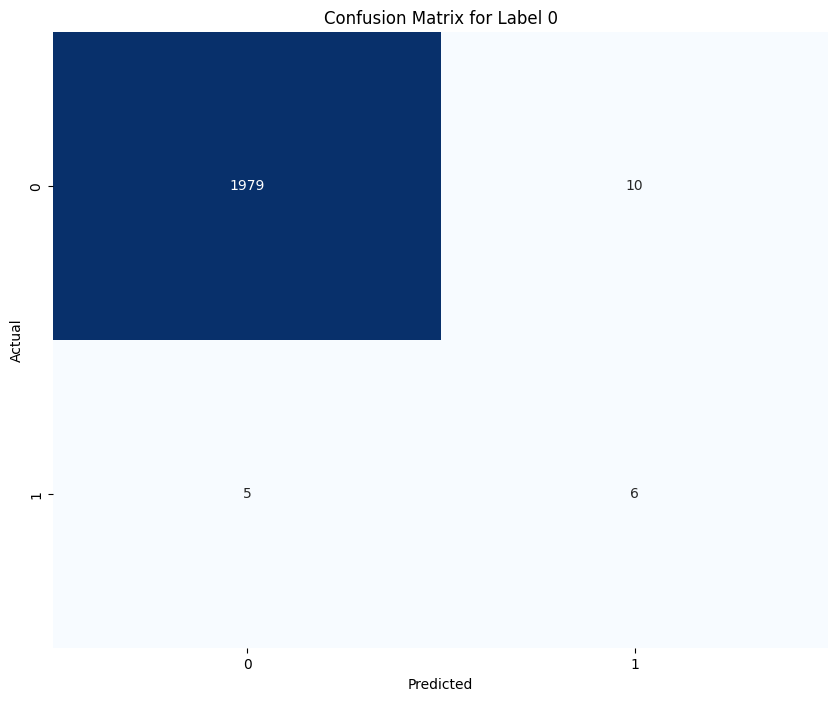

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
# Measure accuracy for multi-label classification
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Draw confusion matrix for multi-label classification
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm[0], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Label 0')
plt.show()

### Explanation

- The `matplotlib.pyplot` and `seaborn` libraries are imported for visualization purposes.
- The `accuracy_score` and `multilabel_confusion_matrix` functions from the `sklearn.metrics` module are imported for evaluating the performance of the multi-label classification model.
- Accuracy is calculated using the `accuracy_score` function by comparing the true labels (`y_test`) with the predicted labels (`y_pred`).
- The confusion matrix for multi-label classification is computed using the `multilabel_confusion_matrix` function, which returns an array of confusion matrices for each label.
- The confusion matrix for label 0 is visualized using a heatmap generated with `seaborn`.
- The heatmap is annotated with the values of the confusion matrix, and the color scheme 'Blues' is applied.
- Axes labels and a title are added to the heatmap for better interpretation.
- The visualization is displayed using `plt.show()`.


# Loading Test Dataset

In [56]:
# Load the test dataset from 'test.csv'
test_data = pd.read_csv('/content/drive/MyDrive/ML_TEXT/test.csv')

### Explanation

- The `test_data` DataFrame is loaded from the CSV file 'test.csv' using the `pd.read_csv` function from the pandas library.
- The file path '/content/drive/MyDrive/ML_TEXT/test.csv' is provided as the argument to `pd.read_csv` to specify the location of the CSV file.
- The contents of the CSV file are read into the DataFrame `test_data`, allowing for further analysis or predictions to be made on the test dataset.


In [57]:
test_data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.414798,0.000000,1.000000,0.000000,0.202060,...,0.0,1.000000,1262,892,NO,NO,NO,0,0.089686,0.193344
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
3,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909


# Handling Missing Values in Test Dataset

In [58]:
# Display the count of missing values before handling
print("Count of Missing Values Before Handling:")
print(test_data.isnull().sum())

# Create an instance of SimpleImputer for numerical columns (e.g., mean strategy)
numerical_columns = test_data.select_dtypes(include=['number']).columns.difference(['id'])
numerical_imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it
test_data[numerical_columns] = numerical_imputer.fit_transform(test_data[numerical_columns])

# Create an instance of SimpleImputer for categorical columns (e.g., most frequent strategy)
categorical_columns = test_data.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
test_data[categorical_columns] = categorical_imputer.fit_transform(test_data[categorical_columns])

# Display the count of missing values after handling
print("\nCount of Missing Values After Handling:")
print(test_data.isnull().sum())

Count of Missing Values Before Handling:
id        0
x1      294
x2      294
x3      294
x4      294
       ... 
x141      0
x142      0
x143      0
x144      0
x145      0
Length: 146, dtype: int64

Count of Missing Values After Handling:
id      0
x1      0
x2      0
x3      0
x4      0
       ..
x141    0
x142    0
x143    0
x144    0
x145    0
Length: 146, dtype: int64


### Explanation

- The count of missing values in the `test_data` DataFrame is displayed before handling missing values.
- The `isnull().sum()` method is used to count the number of missing values in each column of the DataFrame.
- An instance of `SimpleImputer` is created for handling missing values in numerical columns. The strategy used is to fill missing values with the mean of the respective column.
- The numerical columns (excluding the 'id' column) are identified using the `select_dtypes` method, and missing values in these columns are imputed using the `fit_transform` method of the numerical imputer.
- Another instance of `SimpleImputer` is created for handling missing values in categorical columns. The strategy used is to fill missing values with the most frequent value of the respective column.
- Categorical columns are identified using the `select_dtypes` method with `include=['object']`, and missing values in these columns are imputed using the `fit_transform` method of the categorical imputer.
- The count of missing values in the `test_data` DataFrame is displayed again after handling missing values to confirm that all missing values have been properly imputed.


In [59]:
test_data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.414798,0.000000,1.000000,0.000000,0.202060,...,0.0,1.000000,1262.0,892.0,NO,NO,NO,0.0,0.089686,0.193344
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672.0,3311.0,NO,NO,NO,5.0,0.945032,0.471318
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263.0,892.0,NO,NO,NO,8.0,0.557175,0.693587
3,1698004,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672.0,3306.0,YES,NO,YES,0.0,0.870538,0.405822
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400.0,3413.0,YES,NO,YES,2.0,0.224729,0.870909


# Standard Scaling Numerical Columns

In [60]:
# Identify the numerical columns you want to standardize
numerical_columns = test_data.select_dtypes(include=['number']).columns.difference(['id'])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the numerical columns
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

# Display the DataFrame after standard scaling
print("\nDataFrame after Standard Scaling:")
print(test_data.head())


DataFrame after Standard Scaling:
        id  x1  x2                                            x3  \
0  1698001  NO  NO  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  1698002  NO  NO  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   
2  1698003  NO  NO  MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=   
3  1698004  NO  NO  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   
4  1698005  NO  NO  uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=   

                                             x4        x5        x6        x7  \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=  0.875912 -0.420671  0.581416   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA= -0.224462 -0.023355  0.429028   
2  tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=  0.878031 -0.420671  0.581416   
3  hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g= -1.798467 -0.420671 -2.237330   
4  0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=  0.336071  0.273125  0.057804   

         x8        x9  ...      x136      x137      x138      x139 x1

### Explanation

- The numerical columns in the `test_data` DataFrame are identified for standardization using the `select_dtypes` method with the parameter `include=['number']`, excluding the 'id' column using the `difference` method.
- An instance of `StandardScaler` is created and stored in the variable `scaler`.
- The `fit_transform` method of `scaler` is applied to standardize the numerical columns in the `test_data` DataFrame.
- The standardized numerical columns are assigned back to the `test_data` DataFrame.
- The DataFrame `test_data` after standard scaling is printed using the `head` method to display the first few rows.


In [61]:
test_data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,0.875912,-0.420671,0.581416,-0.514483,-0.788692,...,-0.027882,0.641827,-0.904301,-0.921411,NO,NO,NO,-0.608861,-1.607865,-1.199162
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,-0.224462,-0.023355,0.429028,0.469632,0.147886,...,0.671838,-0.468457,1.232005,0.828527,NO,NO,NO,0.319139,1.548636,-0.107652
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,0.878031,-0.420671,0.581416,-0.514483,0.887443,...,-0.727602,0.641827,-0.903674,-0.921411,NO,NO,NO,0.875939,0.117320,0.765118
3,1698004,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,-1.798467,-0.420671,-2.237330,-0.514483,-1.464663,...,-0.027882,-0.440700,1.232005,0.824910,YES,NO,YES,-0.608861,1.273732,-0.364834
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,0.336071,0.273125,0.057804,2.935532,1.460276,...,-0.027882,-0.440700,1.061602,0.902315,YES,NO,YES,-0.237661,-1.109513,1.461402


# Feature Hashing for Dimensionality Reduction

In [62]:
# Specify the number of features (dimensions) after hashing
n_features = 10

# Convert the specified columns to a list of lists
hash_columns = test_data[['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']].astype(str).values.tolist()

# Initialize the FeatureHasher
hasher = FeatureHasher(n_features=n_features, input_type='string')

# Apply feature hashing to the list of lists
hashed_features = hasher.transform(hash_columns)

# Convert the hashed features to a dense NumPy array
hashed_features_array = hashed_features.toarray()

# Create a DataFrame with hashed features
hashed_df = pd.DataFrame(hashed_features_array, columns=[f'hashed_feature_{i}' for i in range(n_features)])

# Concatenate the hashed features with the original test data
test_data = pd.concat([test_data, hashed_df], axis=1)

# Display the DataFrame with hashed features
print("\nDataFrame with Hashed Features:")
print(test_data.head())


DataFrame with Hashed Features:
        id  x1  x2                                            x3  \
0  1698001  NO  NO  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  1698002  NO  NO  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   
2  1698003  NO  NO  MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=   
3  1698004  NO  NO  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   
4  1698005  NO  NO  uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=   

                                             x4        x5        x6        x7  \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=  0.875912 -0.420671  0.581416   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA= -0.224462 -0.023355  0.429028   
2  tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=  0.878031 -0.420671  0.581416   
3  hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g= -1.798467 -0.420671 -2.237330   
4  0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=  0.336071  0.273125  0.057804   

         x8        x9  ... hashed_feature_0 hashed_feature_1 hashed_fea

### Explanation

- The number of features (dimensions) after hashing is specified and stored in the variable `n_features`.
- The specified columns `'x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'` from the `test_data` DataFrame are converted to a list of lists, where each sublist contains the string representations of values in the respective column.
- An instance of `FeatureHasher` is initialized with the specified number of features (`n_features`) and input type (`'string'`).
- Feature hashing is applied to the list of lists (`hash_columns`) using the `transform` method of `hasher`.
- The hashed features are converted to a dense NumPy array and stored in the variable `hashed_features_array`.
- A new DataFrame `hashed_df` is created with the hashed features array, where the columns are named with the convention `'hashed_feature_i'` for `i` ranging from 0 to `n_features - 1`.
- The hashed features DataFrame `hashed_df` is concatenated with the original test data DataFrame `test_data` along `axis=1` using the `concat` function from pandas.
- The DataFrame `test_data` with hashed features is printed using the `head` method to display the first few rows.


In [63]:
test_data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,hashed_feature_0,hashed_feature_1,hashed_feature_2,hashed_feature_3,hashed_feature_4,hashed_feature_5,hashed_feature_6,hashed_feature_7,hashed_feature_8,hashed_feature_9
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,0.875912,-0.420671,0.581416,-0.514483,-0.788692,...,0.0,0.0,-1.0,-2.0,2.0,2.0,1.0,0.0,0.0,-2.0
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,-0.224462,-0.023355,0.429028,0.469632,0.147886,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,0.878031,-0.420671,0.581416,-0.514483,0.887443,...,1.0,0.0,0.0,-1.0,0.0,-4.0,1.0,0.0,0.0,3.0
3,1698004,NO,NO,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,-1.798467,-0.420671,-2.237330,-0.514483,-1.464663,...,-2.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,0.336071,0.273125,0.057804,2.935532,1.460276,...,0.0,1.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-2.0,1.0


# Integrating Hashed Features into Test DataFrame

In [64]:
# Drop the original hash columns from the DataFrame
test_data = test_data.drop(['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'], axis=1)

# Assuming 'hashed_features_array' contains the hashed features array
# Create a DataFrame using the hashed features array with appropriate column names
hashed_features_test = pd.DataFrame(hashed_features_array, columns=[f'hashed_feature_{i}' for i in range(n_features)])

# Concatenate the original DataFrame (excluding the original hash columns) with the new hashed features DataFrame
test_data = pd.concat([test_data, hashed_features_test], axis=1)


### Explanation

- The original hash columns `'x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'` are dropped from the `test_data` DataFrame using the `drop` method with `axis=1`.
- The DataFrame `hashed_features_test` is created using the `hashed_features_array`, where the columns are named with the convention `'hashed_feature_i'` for `i` ranging from 0 to `n_features - 1`.
- The original DataFrame `test_data` (excluding the original hash columns) is concatenated with the new hashed features DataFrame `hashed_features_test` along `axis=1` using the `concat` function from pandas.


In [65]:
test_data.head()

,id,x1,x2,x5,x6,x7,x8,x9,x10,x11,...,hashed_feature_0,hashed_feature_1,hashed_feature_2,hashed_feature_3,hashed_feature_4,hashed_feature_5,hashed_feature_6,hashed_feature_7,hashed_feature_8,hashed_feature_9
0,1698001,NO,NO,0.875912,-0.420671,0.581416,-0.514483,-0.788692,NO,NO,...,0.0,0.0,-1.0,-2.0,2.0,2.0,1.0,0.0,0.0,-2.0
1,1698002,NO,NO,-0.224462,-0.023355,0.429028,0.469632,0.147886,YES,NO,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,1698003,NO,NO,0.878031,-0.420671,0.581416,-0.514483,0.887443,NO,NO,...,1.0,0.0,0.0,-1.0,0.0,-4.0,1.0,0.0,0.0,3.0
3,1698004,NO,NO,-1.798467,-0.420671,-2.237330,-0.514483,-1.464663,NO,NO,...,-2.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0
4,1698005,NO,NO,0.336071,0.273125,0.057804,2.935532,1.460276,NO,NO,...,0.0,1.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-2.0,1.0


# Encoding Categorical Columns with LabelEncoder

In [66]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your feature dataframe
label_encoder = LabelEncoder()
categorical_columns = ['x1', 'x2', 'x10', 'x11', 'x12', 'x13', 'x14', 'x24', 'x25', 'x26', 'x30', 'x31', 'x32', 'x33', 'x41', 'x42', 'x43', 'x44', 'x45', 'x55', 'x56', 'x57', 'x62', 'x63', 'x71', 'x72', 'x73', 'x74', 'x75', 'x85', 'x86', 'x87', 'x92', 'x93', 'x101', 'x102', 'x103','x104','x105', 'x115', 'x116', 'x117', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140', 'x141', 'x142']

# Apply label encoding to each categorical column
for column in categorical_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])


### Explanation

- The `LabelEncoder` class from the `sklearn.preprocessing` module is imported for label encoding categorical data.
- An instance of `LabelEncoder` is created and stored in the variable `label_encoder`.
- A list named `categorical_columns` is initialized to contain the names of categorical columns in the DataFrame `test_data`.
- Label encoding is applied to each categorical column in the DataFrame `test_data`:
  - For each column in `categorical_columns`, label encoding is performed using the `fit_transform` method of `label_encoder`.
  - The original categorical values in the column are replaced with their corresponding encoded labels.


# Removing 'id' Column from Test Dataset

In [67]:
test_data = test_data.drop('id', axis=1)

### Explanation

- The 'id' column is dropped from the `test_data` DataFrame using the `drop` method with `axis=1`.
- The axis parameter is set to 1 to indicate that the 'id' column should be dropped along the columns (axis=1) rather than along the rows (axis=0).
- After this operation, the `test_data` DataFrame will no longer contain the 'id' column.


# Comparing Column Names between X_test and Test Data

In [68]:
print("Columns in X_test:", list(X_test.columns))
print("Columns in test_data:", list(test_data.columns))

Columns in X_test: ['x1', 'x2', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x62', 'x63', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x92', 'x93', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x135', 'x136', 'x137', 'x138', 'x139', 'x140', 'x141', 'x142', 'x143', 'x144', 'x14

### Explanation

- The columns in the DataFrame `X_test` are printed using the `columns` attribute, converted to a list, and displayed.
- Similarly, the columns in the DataFrame `test_data` are printed using the `columns` attribute, converted to a list, and displayed.
- This comparison helps to ensure that the columns in the test dataset (`test_data`) are consistent with the columns used during training (`X_test`), which is crucial for making predictions on the test data using the trained model.


# Checking Column Order Consistency

In [69]:
if list(X_test.columns) != list(test_data.columns):
    print("Column order mismatch between X_test and test_data.")
else:
    print("Both DataFrames have the same column order now.")

Column order mismatch between X_test and test_data.


### Explanation

- This code snippet checks if the column order of the DataFrame `X_test` is the same as the column order of the DataFrame `test_data`.
- It first converts the column names of both DataFrames into lists using the `list()` function and compares them.
- If there is a mismatch in the column order, it prints "Column order mismatch between X_test and test_data."
- Otherwise, it prints "Both DataFrames have the same column order now."
- Ensuring consistent column order is important, especially when making predictions on the test data using a model trained on the training data.


# Removing Duplicate Columns and Reordering Columns

In [70]:
# Remove duplicate columns by keeping only the first occurrence
test_data = test_data.loc[:, ~test_data.columns.duplicated()]

# Reorder the columns of test_data to match the order in X_test
test_data = test_data[X_test.columns]

# Check if columns are now in the same order
if list(X_test.columns) != list(test_data.columns):
    print("Column order mismatch between X_test and test_data.")
else:
    print("Both DataFrames have the same column order now.")

Both DataFrames have the same column order now.


### Explanation

- Duplicate columns in the `test_data` DataFrame are removed by keeping only the first occurrence of each column using the `loc` indexer and the `~` operator with the `duplicated()` method of the DataFrame's `columns`.
- The columns of `test_data` are reordered to match the order of columns in the `X_test` DataFrame.
- The comparison between the column orders of `X_test` and `test_data` is performed again.
- If there is a mismatch in the column order, it prints "Column order mismatch between X_test and test_data."
- Otherwise, it prints "Both DataFrames have the same column order now."
- This ensures that both DataFrames have the same column order, which is important for consistency when making predictions on the test data using a model trained on the training data.


# Saving Trained Model

In [71]:
# Assuming tree_model is your trained model
import joblib

joblib.dump(tree_model, 'tree_model.joblib')


['tree_model.joblib']

### Explanation

- The `joblib.dump()` function from the `joblib` library is used to save the trained decision tree model `tree_model` to a file named 'tree_model.joblib'.
- This function serializes the model object into a binary file, which can later be loaded and used for making predictions or further analysis.
- Saving the trained model allows for easy deployment and reuse without the need to retrain the model every time it is needed.


# Loading Saved Model and Making Predictions

In [72]:
# Load the model
loaded_tree_model = joblib.load('tree_model.joblib')

# Make predictions on test_data
f_pred = loaded_tree_model.predict(test_data)


### Explanation

- The `joblib.load()` function from the `joblib` library is used to load the trained decision tree model from the file 'tree_model.joblib' into a new variable named `loaded_tree_model`.
- This function loads the serialized model object stored in the binary file back into memory, allowing it to be used for making predictions.
- The loaded model `loaded_tree_model` is then used to make predictions on the `test_data` DataFrame using the `predict()` method.
- The predicted labels are stored in a variable named `f_pred`, which can be further analyzed or used for evaluation.


# Displaying Predictions

In [73]:
print(f_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


### Explanation

- The variable `f_pred` contains the predictions made by the loaded decision tree model on the `test_data`.
- Printing `f_pred` will display the predicted labels generated by the model, which can be further analyzed or compared with the true labels for evaluation.


# Generating Output DataFrame

In [74]:
# Assuming ids is a list of corresponding ids
ids = ["1698001"] * len(f_pred)  # Replace with your actual list of ids

# Create a list to store dictionaries representing rows
data = []

# Iterate through the predictions
for i, id_value in enumerate(ids):
    for j, pred_value in enumerate(f_pred[i]):
        label = f"{id_value}_y{j+1}"
        data.append({'id_label': label, 'pred': pred_value})

# Create a DataFrame using pandas.concat
output_df = pd.concat([pd.DataFrame([row]) for row in data], ignore_index=True)

# Display the output DataFrame
print(output_df)


          id_label  pred
0       1698001_y1     0
1       1698001_y2     0
2       1698001_y3     0
3       1698001_y4     0
4       1698001_y5     0
...            ...   ...
65995  1698001_y29     0
65996  1698001_y30     0
65997  1698001_y31     0
65998  1698001_y32     0
65999  1698001_y33     1

[66000 rows x 2 columns]


### Explanation

- Assuming `ids` is a list of corresponding ids, in this case, a single id value "1698001" repeated for the length of `f_pred`.
- A list named `data` is initialized to store dictionaries representing rows of the output DataFrame.
- Iterating through the predictions, for each id and its corresponding predictions:
  - A label is constructed combining the id and the index of the prediction (e.g., "1698001_y1", "1698001_y2", etc.).
  - A dictionary representing the row is created with keys 'id_label' and 'pred', storing the label and the corresponding prediction value, respectively.
  - Each dictionary representing a row is appended to the `data` list.
- A DataFrame `output_df` is created using `pd.concat` by concatenating DataFrames created from each dictionary in the `data` list, with the parameter `ignore_index=True` to reset the index of the resulting DataFrame.
- The output DataFrame `output_df` contains the id-labels and corresponding predictions, which can be further analyzed or exported for further use.


# Saving Output Predictions to CSV

In [75]:
# Save the DataFrame to a CSV file
output_df.to_csv('output_predictions.csv', index=False)

### Explanation

- The DataFrame `output_df` containing the predictions is saved to a CSV file named 'output_predictions.csv' using the `to_csv` method of pandas DataFrame.
- The parameter `index=False` is used to exclude the row indices from being written to the CSV file.
- Saving the predictions to a CSV file allows for easy storage and sharing of the model's predictions for further analysis or evaluation.
